In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
merged_data = pd.read_csv("../data/college_clean.csv")

# Explore the data
print(merged_data.head())  
print(merged_data.info())  


                    School Name Private  Apps  Accept  Tuition/Semester  \
0  Abilene Christian University     Yes  1660    1232              7440   
1            Adelphi University     Yes  2186    1924             12280   
2                Adrian College     Yes  1428    1097             11250   
3           Agnes Scott College     Yes   417     349             12960   
4     Alaska Pacific University     Yes   193     146              7560   

   Personal Spending/Semester  Book Costs/Semester  Room & Board/Semester  \
0                        2200                  450                   3300   
1                        1500                  750                   6450   
2                        1165                  400                   3750   
3                         875                  450                   5450   
4                        1500                  800                   4120   

   Early Career Pay  Mid-Career Pay  % STEM Degrees  % Grad rate  \
0           61500.

In [73]:
print(merged_data.columns)


Index(['School Name', 'Private', 'Apps', 'Accept', 'Tuition/Semester',
       'Personal Spending/Semester', 'Book Costs/Semester',
       'Room & Board/Semester', 'Early Career Pay', 'Mid-Career Pay',
       '% STEM Degrees', '% Grad rate', 'Total Cost/Semester',
       'Acceptance Rate', 'Early Career Pay / Cost', 'Mid-Career Pay / Cost',
       'Expected Early Career Pay / cost', 'Expected Mid-Career Pay / cost'],
      dtype='object')


In [74]:

merged_data.dropna(inplace=True)


merged_data['Tuition/Semester'] = merged_data['Tuition/Semester'].astype(float)
merged_data['Early Career Pay'] = merged_data['Early Career Pay'].astype(float)



In [75]:
# sort data
sorted_data = merged_data.sort_values(by=['Tuition/Semester', 'Early Career Pay', 'Mid-Career Pay'], ascending=False)

# top 10 rows
top_10_tuition = sorted_data.nlargest(10, 'Tuition/Semester')[['School Name', 'Private', 'Tuition/Semester', 'Early Career Pay', 'Mid-Career Pay']]
top_10_starting_income = sorted_data.nlargest(10, 'Early Career Pay')[['School Name', 'Private', 'Tuition/Semester', 'Early Career Pay', 'Mid-Career Pay']]
top_10_mid_career_income = sorted_data.nlargest(10, 'Mid-Career Pay')[['School Name', 'Private', 'Tuition/Semester', 'Early Career Pay', 'Mid-Career Pay']]

# Concatenate the top 5 dataframes
top_10_values = pd.concat([top_10_tuition, top_10_starting_income, top_10_mid_career_income])

# Display the new DataFrame as a table
print(top_10_values)





                               School Name Private  Tuition/Semester  \
32                      Bennington College     Yes           21700.0   
214  Massachusetts Institute of Technology     Yes           20100.0   
134                     Gettysburg College     Yes           19964.0   
278                           Reed College     Yes           19960.0   
272                   Princeton University     Yes           19900.0   
451                        Yale University     Yes           19840.0   
13                         Amherst College     Yes           19760.0   
145                       Hamilton College     Yes           19700.0   
255                        Oberlin College     Yes           19670.0   
441                       Williams College     Yes           19629.0   
153                    Harvey Mudd College     Yes           17230.0   
214  Massachusetts Institute of Technology     Yes           20100.0   
52              Carnegie Mellon University     Yes           179

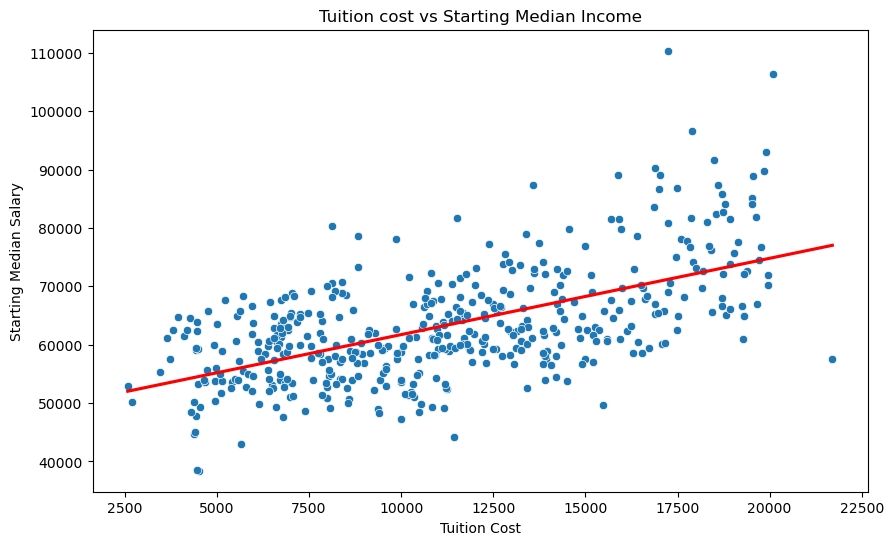

In [99]:
# Scatter plot: Tuition cost vs Starting Median Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tuition/Semester', y='Early Career Pay', data=merged_data)
sns.regplot(x='Tuition/Semester', y='Early Career Pay', data=merged_data, scatter=False, color='red', ci=None)
plt.title('Tuition cost vs Starting Median Income')
plt.xlabel('Tuition Cost')
plt.ylabel('Starting Median Salary')
plt.savefig('../data/tuition_cost_vs_starting_median_income')
plt.show()



In [77]:
# Calculate correlation between Tuition cost and Starting Median Income

correlation = merged_data['Tuition/Semester'].corr(merged_data['Early Career Pay'])
print("Correlation between Tuition cost and Starting Median Income:", correlation)


Correlation between Tuition cost and Starting Median Income: 0.5925665296512272


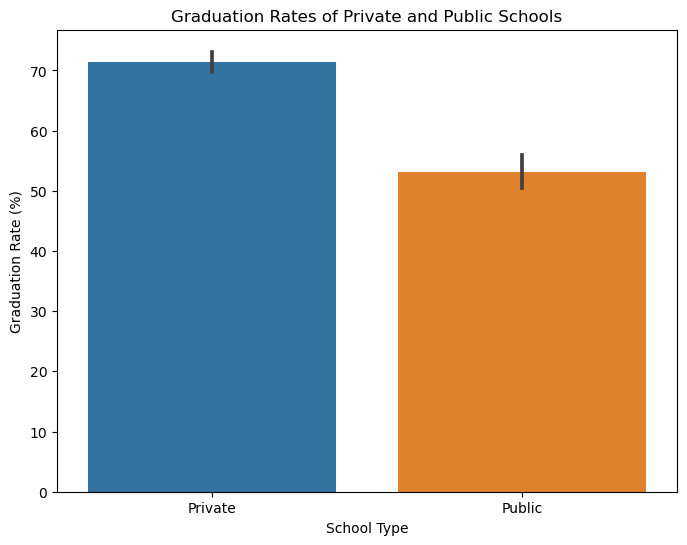

In [78]:
# Bar plot: Graduation rates of private and public schools
plt.figure(figsize=(8, 6))
sns.barplot(x='Private', y='% Grad rate', data=merged_data)
plt.title('Graduation Rates of Private and Public Schools')
plt.xlabel('School Type')
plt.ylabel('Graduation Rate (%)')
plt.xticks(ticks=[0, 1], labels=['Private', 'Public'])  
plt.savefig('../data/graduation_rates_public_and_private')
plt.show()



In [79]:
# Calculate average graduation rates for private and public schools
avg_private_grad_rate = merged_data[merged_data['Private'] == 'Yes']['% Grad rate'].mean()
avg_public_grad_rate = merged_data[merged_data['Private'] == 'No']['% Grad rate'].mean()

# Print average graduation rates
print("Average Graduation Rate for Private Schools:", avg_private_grad_rate)
print("Average Graduation Rate for Public Schools:", avg_public_grad_rate)

# Compare average graduation rates
if avg_private_grad_rate > avg_public_grad_rate:
    print("Private schools have a higher average graduation rate.")
elif avg_private_grad_rate < avg_public_grad_rate:
    print("Public schools have a higher average graduation rate.")
else:
    print("Average graduation rates for private and public schools are equal.")

Average Graduation Rate for Private Schools: 71.45299145299145
Average Graduation Rate for Public Schools: 53.166666666666664
Private schools have a higher average graduation rate.


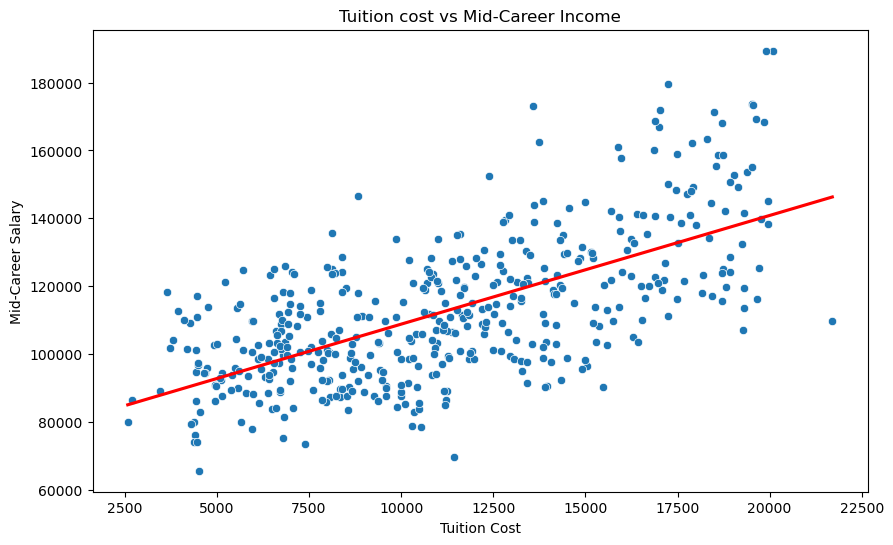

In [98]:
# Scatter plot: Tuition cost vs Mid-Career Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tuition/Semester', y='Mid-Career Pay', data=merged_data)
sns.regplot(x='Tuition/Semester', y='Mid-Career Pay', data=merged_data, scatter=False, color='red', ci=None)
plt.title('Tuition cost vs Mid-Career Income')
plt.xlabel('Tuition Cost')
plt.ylabel('Mid-Career Salary')
plt.savefig('../data/tuition_cost_vs_mid_career_income')
plt.show()


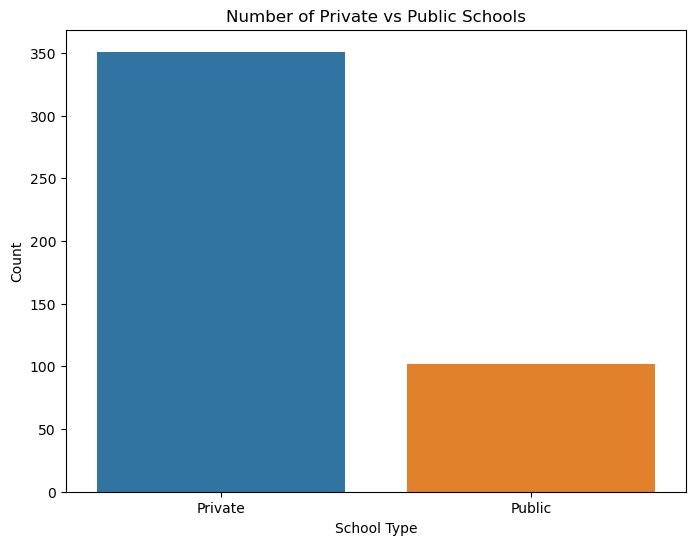

In [81]:
# Bar plot: Private vs public
plt.figure(figsize=(8, 6))
sns.countplot(x='Private', data=merged_data)
plt.title('Number of Private vs Public Schools')
plt.xlabel('School Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Private', 'Public'])  
plt.savefig('../data/number_of_private_vs_public_schools')
plt.show()


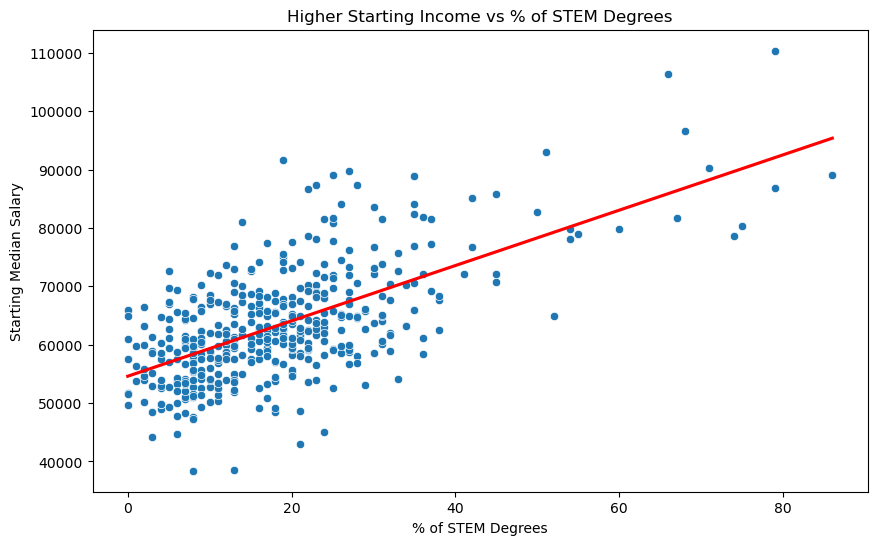

In [97]:
# Scatter plot: Higher starting income vs % of Stem
plt.figure(figsize=(10, 6))
sns.scatterplot(x='% STEM Degrees', y='Early Career Pay', data=merged_data)
sns.regplot(x='% STEM Degrees', y='Early Career Pay', data=merged_data, scatter=False, color='red', ci=None)
plt.title('Higher Starting Income vs % of STEM Degrees')
plt.xlabel('% of STEM Degrees')
plt.ylabel('Starting Median Salary')
plt.show()

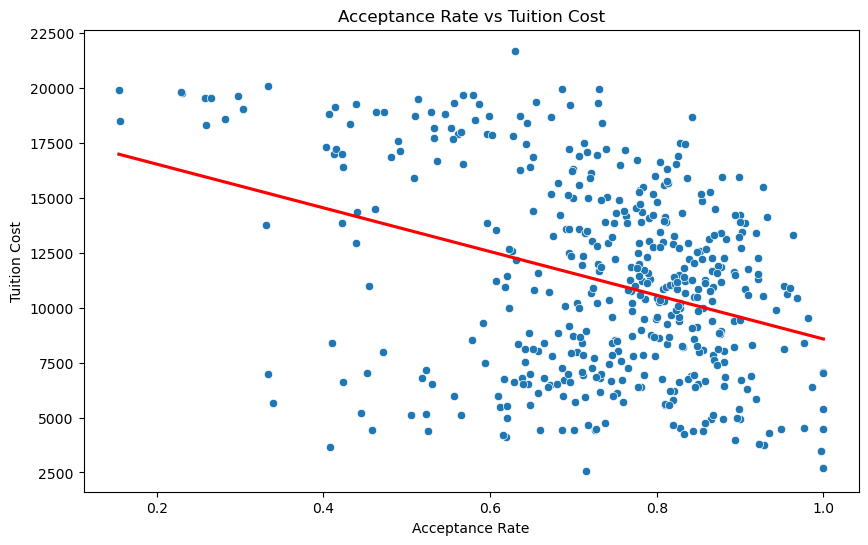

In [96]:
# Scatter plot: Acceptance rate vs Tuition cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Acceptance Rate', y='Tuition/Semester', data=merged_data)
sns.regplot(x='Acceptance Rate', y='Tuition/Semester', data=merged_data, scatter=False, color='red', ci=None)
plt.title('Acceptance Rate vs Tuition Cost')
plt.xlabel('Acceptance Rate')
plt.ylabel('Tuition Cost')
plt.show()

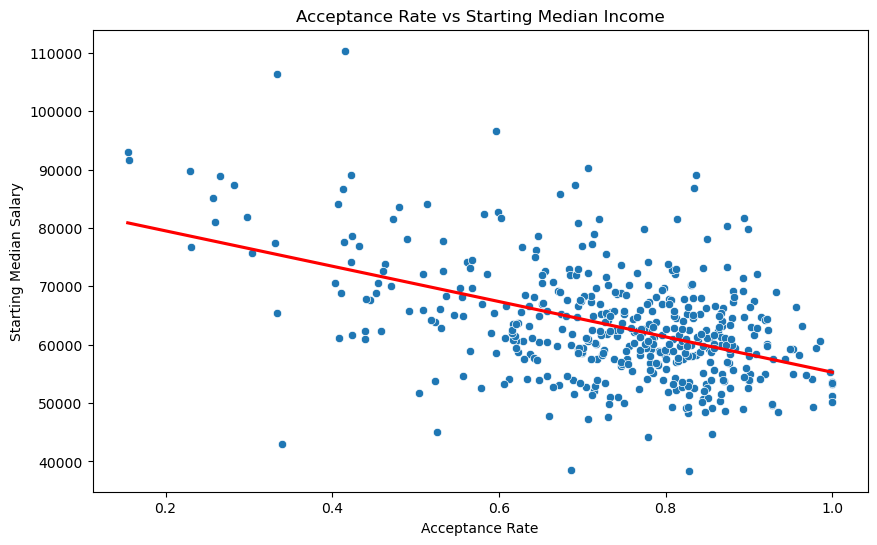

In [95]:
# Scatter plot: Acceptance rate vs Starting Median Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Acceptance Rate', y='Early Career Pay', data=merged_data)
sns.regplot(x='Acceptance Rate', y='Early Career Pay', data=merged_data, scatter=False, color='red', ci=None)
plt.title('Acceptance Rate vs Starting Median Income')
plt.xlabel('Acceptance Rate')
plt.ylabel('Starting Median Salary')
plt.show()

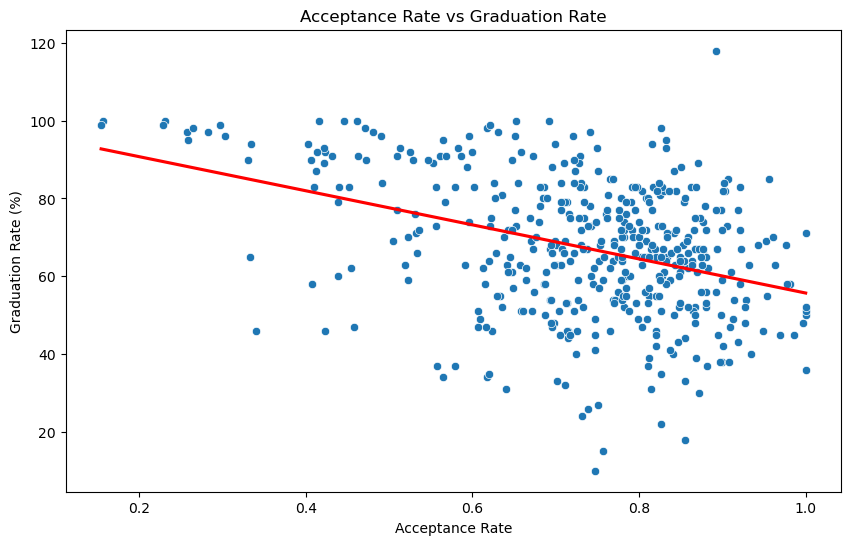

In [94]:
# Scatter plot: Acceptance rate vs Graduation Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Acceptance Rate', y='% Grad rate', data=merged_data)
sns.regplot(x='Acceptance Rate', y='% Grad rate', data=merged_data, scatter=False, color='red', ci=None)
plt.title('Acceptance Rate vs Graduation Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Graduation Rate (%)')
plt.show()

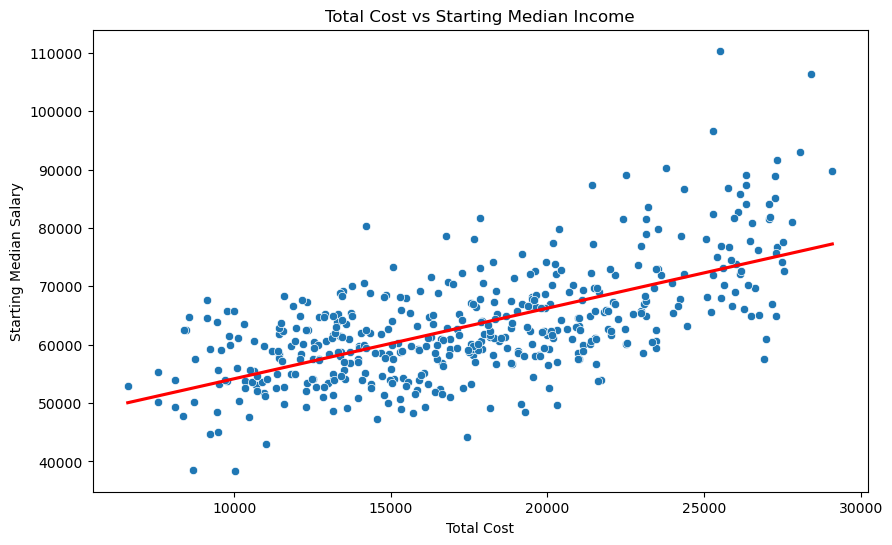

In [100]:
# Calculate total cost (Tuition + Personal Spending + Book Costs + Room & Board)
merged_data['Total Cost'] = merged_data['Tuition/Semester'] + merged_data['Personal Spending/Semester'] + merged_data['Book Costs/Semester'] + merged_data['Room & Board/Semester']

# Scatter plot: Total Cost vs Starting Median Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Cost', y='Early Career Pay', data=merged_data)
sns.regplot(x='Total Cost', y='Early Career Pay', data=merged_data, scatter=False, color='red', ci=None)
plt.title('Total Cost vs Starting Median Income')
plt.xlabel('Total Cost')
plt.ylabel('Starting Median Salary')
plt.savefig('../data/total_cost_vs_starting_income')
plt.show()



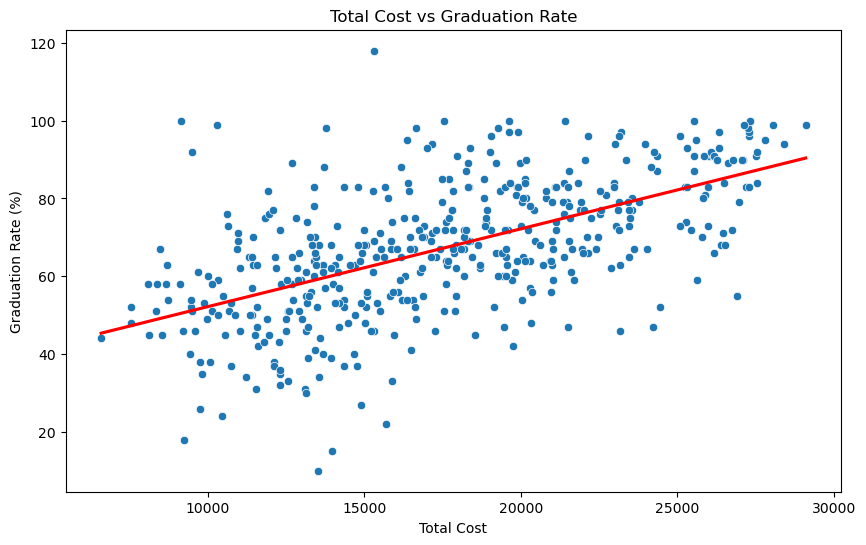

In [101]:
# Scatter plot: Total Cost vs Graduation Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Cost', y='% Grad rate', data=merged_data)
sns.regplot(x='Total Cost', y='% Grad rate', data=merged_data, scatter=False, color='red', ci=None)
plt.title('Total Cost vs Graduation Rate')
plt.xlabel('Total Cost')
plt.ylabel('Graduation Rate (%)')
plt.show()

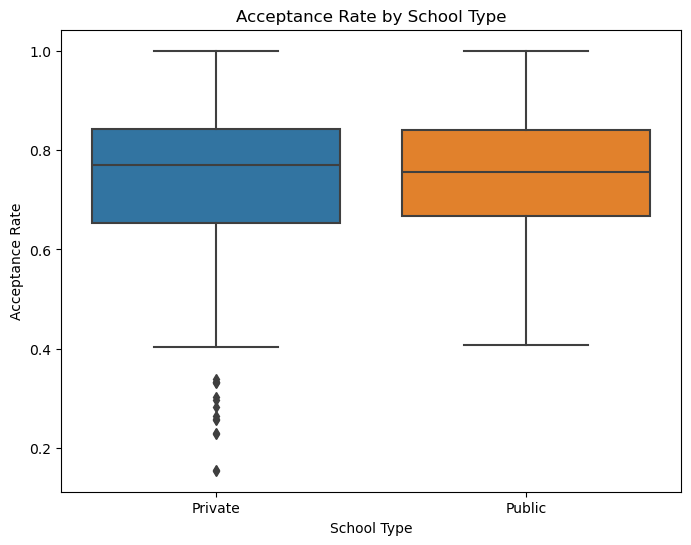

In [88]:
# Box plot: Acceptance Rate by School Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Private', y='Acceptance Rate', data=merged_data)
plt.title('Acceptance Rate by School Type')
plt.xlabel('School Type')
plt.ylabel('Acceptance Rate')
plt.xticks(ticks=[0, 1], labels=['Private', 'Public'])  


plt.show()

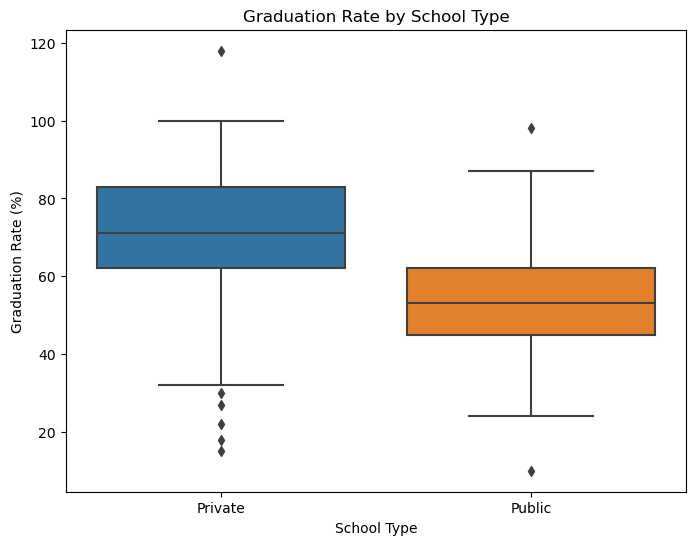

In [89]:
# Box plot: Graduation Rate by School Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Private', y='% Grad rate', data=merged_data)
plt.title('Graduation Rate by School Type')
plt.xlabel('School Type')
plt.ylabel('Graduation Rate (%)')
plt.xticks(ticks=[0, 1], labels=['Private', 'Public'])  

plt.show()

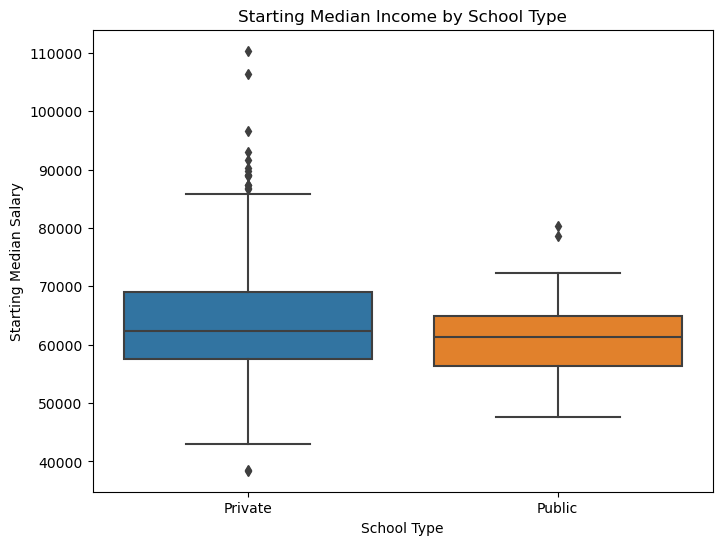

In [90]:
# Box plot: Starting Median Income by School Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Private', y='Early Career Pay', data=merged_data)
plt.title('Starting Median Income by School Type')
plt.xlabel('School Type')
plt.ylabel('Starting Median Salary')
plt.xticks(ticks=[0, 1], labels=['Private', 'Public'])  
plt.savefig('../data/starting_median_income_by_school_type')
plt.show()


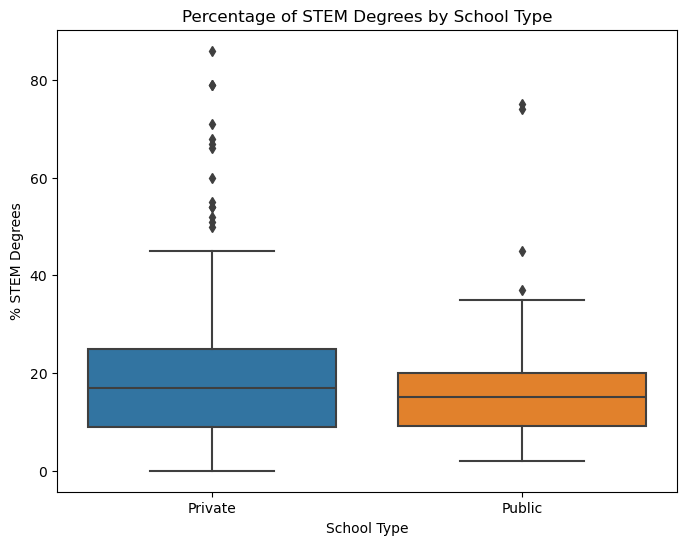

In [91]:
# Box plot: Percentage of STEM Degrees by School Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Private', y='% STEM Degrees', data=merged_data)
plt.title('Percentage of STEM Degrees by School Type')
plt.xlabel('School Type')
plt.ylabel('% STEM Degrees')
plt.xticks(ticks=[0, 1], labels=['Private', 'Public'])  
plt.savefig('../data/%_stem_degrees_by_school_type')
plt.show()


In [51]:
#this histogram that visualizes the percentage growth in mid-career income compared to the starting median income. 
#How much income grows from the start of one's career to mid-career. 
#Frequency tells us how common certain levels of percentage growth are within the merged_df
#I divided the data to 20 bins so the bars represent specific ranges of percentage growth values

#so the question here was how mid-career income growth varies among individuals in the merged_df
#trying to identify the patterns, outliers, distribution of income growth


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


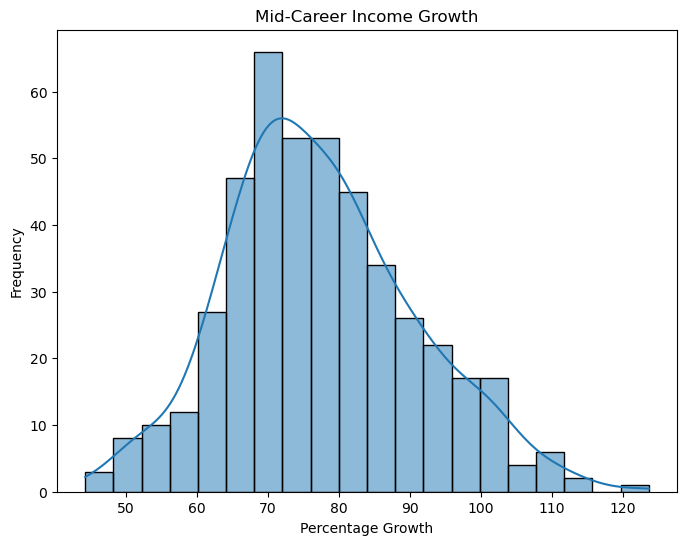

In [23]:
# Calculate percentage growth in mid-career income compared to starting median income
merged_data['Mid-Career Income Growth'] = ((merged_data['Mid-Career Pay'] - merged_data['Early Career Pay']) / merged_data['Early Career Pay']) * 100

# Histogram: Mid-Career Income Growth
plt.figure(figsize=(8, 6))
sns.histplot(merged_data['Mid-Career Income Growth'], bins=20, kde=True)
plt.title('Mid-Career Income Growth')
plt.xlabel('Percentage Growth')
plt.ylabel('Frequency')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


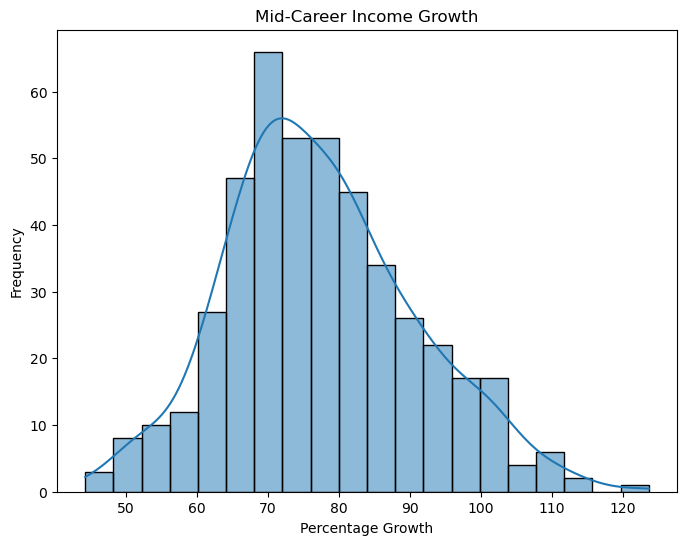

In [24]:
# Calculate percentage growth in mid-career income compared to starting median income
merged_data['Mid-Career Income Growth'] = ((merged_data['Mid-Career Pay'] - merged_data['Early Career Pay']) / merged_data['Early Career Pay']) * 100

# Histogram: Mid-Career Income Growth
plt.figure(figsize=(8, 6))
sns.histplot(merged_data['Mid-Career Income Growth'], bins=20, kde=True)
plt.title('Mid-Career Income Growth')
plt.xlabel('Percentage Growth')
plt.ylabel('Frequency')
plt.show()

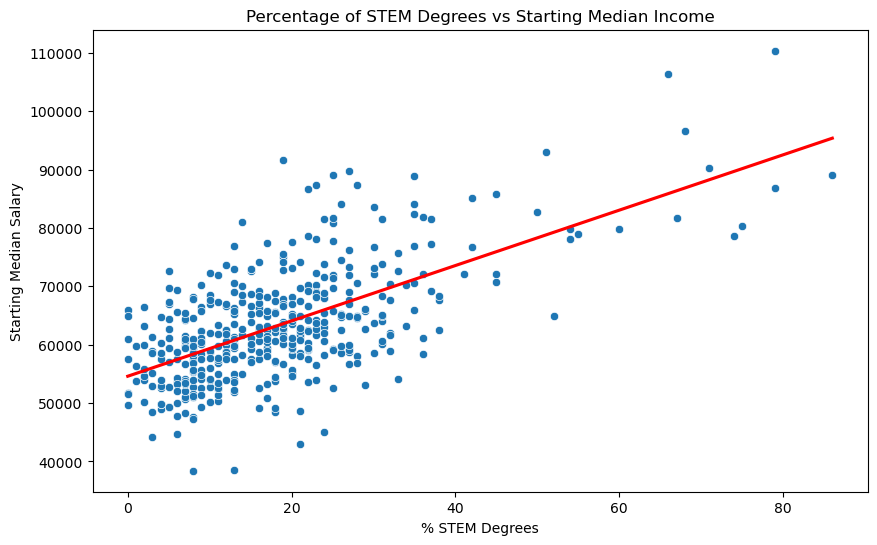

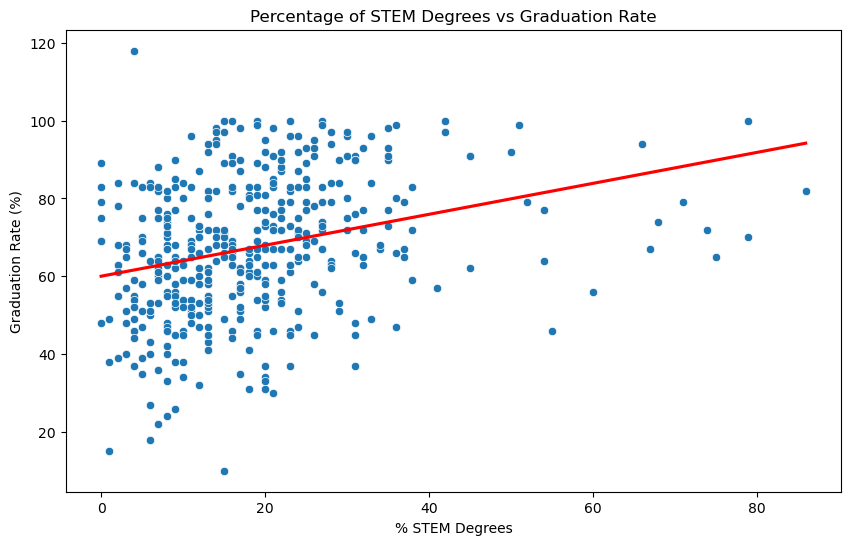

In [102]:
# Scatter plot: Percentage of STEM Degrees vs Starting Median Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='% STEM Degrees', y='Early Career Pay', data=merged_data)
sns.regplot(x='% STEM Degrees', y='Early Career Pay', data=merged_data, scatter=False, color='red', ci=None)
plt.title('Percentage of STEM Degrees vs Starting Median Income')
plt.xlabel('% STEM Degrees')
plt.ylabel('Starting Median Salary')
plt.show()

# Scatter plot: Percentage of STEM Degrees vs Graduation Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='% STEM Degrees', y='% Grad rate', data=merged_data)
sns.regplot(x='% STEM Degrees', y='% Grad rate', data=merged_data, scatter=False, color='red', ci=None)
plt.title('Percentage of STEM Degrees vs Graduation Rate')
plt.xlabel('% STEM Degrees')
plt.ylabel('Graduation Rate (%)')
plt.savefig('../data/%_stem_degrees_vs_starting_income')
plt.show()

